# Part 2 of Links and Relationships: Link geometry

This page is primarily based on the following page at the Circos documentation site:



- [2. Link geometry](????????????)



That page is found as part number 4 of the ??? part ['Links and Relationships' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).



Go back to Part 1 by clicking [here &#8592;](Links_Part1.ipynb).



----



5 --- Links and Relationships
=============================

2. Link geometry
----------------

::: {#menu4}
[[Lesson](/documentation/tutorials/links/geometry/lesson){.clean}]{.active}
[Images](/documentation/tutorials/links/geometry/images){.normal}
[Configuration](/documentation/tutorials/links/geometry/configuration){.normal}
:::

Link geometry is defined by four parameters: radius, bezier\_radius,
bezier\_radius\_purity and crest. An additional set of parameters in the
perturb\* name space permits random adjustment to some of these
parameters.

### radius

This value sets the radial position of the termini of the links and may
be defined as a relative or absolute value.

```ini
# 50% of inner ideogram radius
radius = 0.5r 
```


```ini
# 50 pixels inside inner ideogram radius
radius = 1r - 50p
```


```ini
# 25 pixels outside inner ideogram radius
# careful - links will overlap with ideogram
radius = 1r + 25p
```


```ini
# links terminate 750 pixels from image center
radius = 750p
```


I suggest that you set the radius value to be relative, to make it
easier to later resize the figure without having to adjust the radius
value.

A combination of relative and absolute values permits an overall
relative position with a fixed margin.

### bezier\_radius

The bezier\_radius controls the radial position of the control point
used to accentuate the curvature in the link. Without any additional
parameters, each link will have its control point placed at the same
radial position, regardless of the location of the start and end points
of the link.

### crest

Two additional Bezier control points can be set by using the crest
parameter. When defined, points p3 and p4 are added. These points lie at
the same angular position as the start and end link termini and have the
radial position

```ini
p3r,p4r = radius +/- |bezier_radius - radius| * crest
```


In the crest=0 extreme, p3 and p4 are at the same position as p0,p1. In
this case, crest has no effect. When crest=1, p3,p4 are at the radial
position of p2, the control point set by bezier\_radius. Keep in mind
the difference between p2 and p3,p4 control points - p2 is placed along
the radius that bisects angle formed by p0,center,p1 whereas p3,p4 are
placed along the same radius as p0,p1.

The purpose of the crest parameter is to make the links terminate
perpendicularly to the ideogram radius. Cresting works only if
bezier\_radius is defined.

### bezier\_radius\_purity

The bezier\_radius parameter is constant for all links. Therefore,
regardless of a link\'s start/end position, the p2 control point will
always be at the same radial position, as determined by the
bezier\_radius value. This has the effect of making links that have
nearby start/end termini highly curved.

To mitigate this, bezier\_radius\_purity allows you to define an
effective bezier radius, which is a function of the distance between the
link\'s start/end termini.

The bezier\_radius\_purity adjusts the position of p2 for each link. The
p2 control point will move along the line formed by the original p2
location and the intersection of p0-p1 and the bisecting radius. When
purity = 1, p2\' = p2. When purity = 0, p2\' = midpoint(p0,p1).

If bezier\_radius\_purity is defined, crest will use the new bezier
radius control point (p2\').

### perturb

A set of parameters can be used to randomly adjust bezier\_radius,
bezier\_radius\_purity, and crest parameters to give the links a more
disorganized, organic feel. By perturbing each link you can also show
additional texture in the data among links which would have ordinarily
overlapped.

Each parameter\'s perturbation amount is defined as a pair of values -
pmin,pmax. These are the minimum and maximum multipliers by which the
value can be perturbed.

Given a perturbation (pmin,pmax), the modification is defined by

```ini
new_value = value * [ pmin + (pmax-pmin)*urd ]
```


where urd is a uniform random deviate in the range \[0,1). Thus, the new
value will be sampled uniformly from the range \[value\*pmin,
value\*pmax\].

For example, if you define

```ini
perturb               = yes
perturb_crest         = 0
perturb_bezier_radius = 0.5,1.2
perturb_bezier_radius_purity = 0.5,1
```


then crest will remain unperturbed, and bezier radius and radius purity
will be randomly scaled between 50-120% and 50-100% of their original
values, respectively.

By using pmin\<0, you can force some values to become negative at times.
For example, if crest = 0.5, then perturb\_crest = -1,2 would perturb
crest to lie in the range \[-0.5,1).

Experiment with the values, starting small unless you want *very*
organic images. The curves.repeated.txt data set bundled with this
tutorial provides a data set with 7 identical sets of 24 links. By
applying perturbation, each links from a set will be drawn differently,
exposing the effect of parameter adjustment on the final curve.




----

### Generating the plot produced by this example code


The following two cells will generate the plot. The first cell adjusts the current working directory.

In [1]:
%cd ../circos-tutorials-0.67/tutorials/5/2/

/home/jovyan/circos-tutorials-0.67/tutorials/5/2


In [2]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.36s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.37s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/5/2
debuggroup summary 0.37s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.37s loading configuration from file circos.conf
debuggroup summary 0.37s found conf file circos.conf
debuggroup summary 0.53s debug will appear for these features: output,summary
debuggroup summary 0.53s bitmap output image ./circos.png
debuggroup summary 0.53s SVG output image ./circos.svg
debuggroup summary 0.53s parsing karyotype and organizing ideograms
debuggroup summary 0.63s karyotype has 24 chromosomes of total size 3,095,677,436
debuggroup summary 0.63s applying global and local scaling
debuggroup summary 0.63s allocating image, colors and brushes
debuggroup summary 2.70s drawing 3 ideograms of total size 690,472,427
debuggroup summary 2.70s drawing highlights and ideograms
debuggroup summary

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.


View the plot in this page using the following cell.

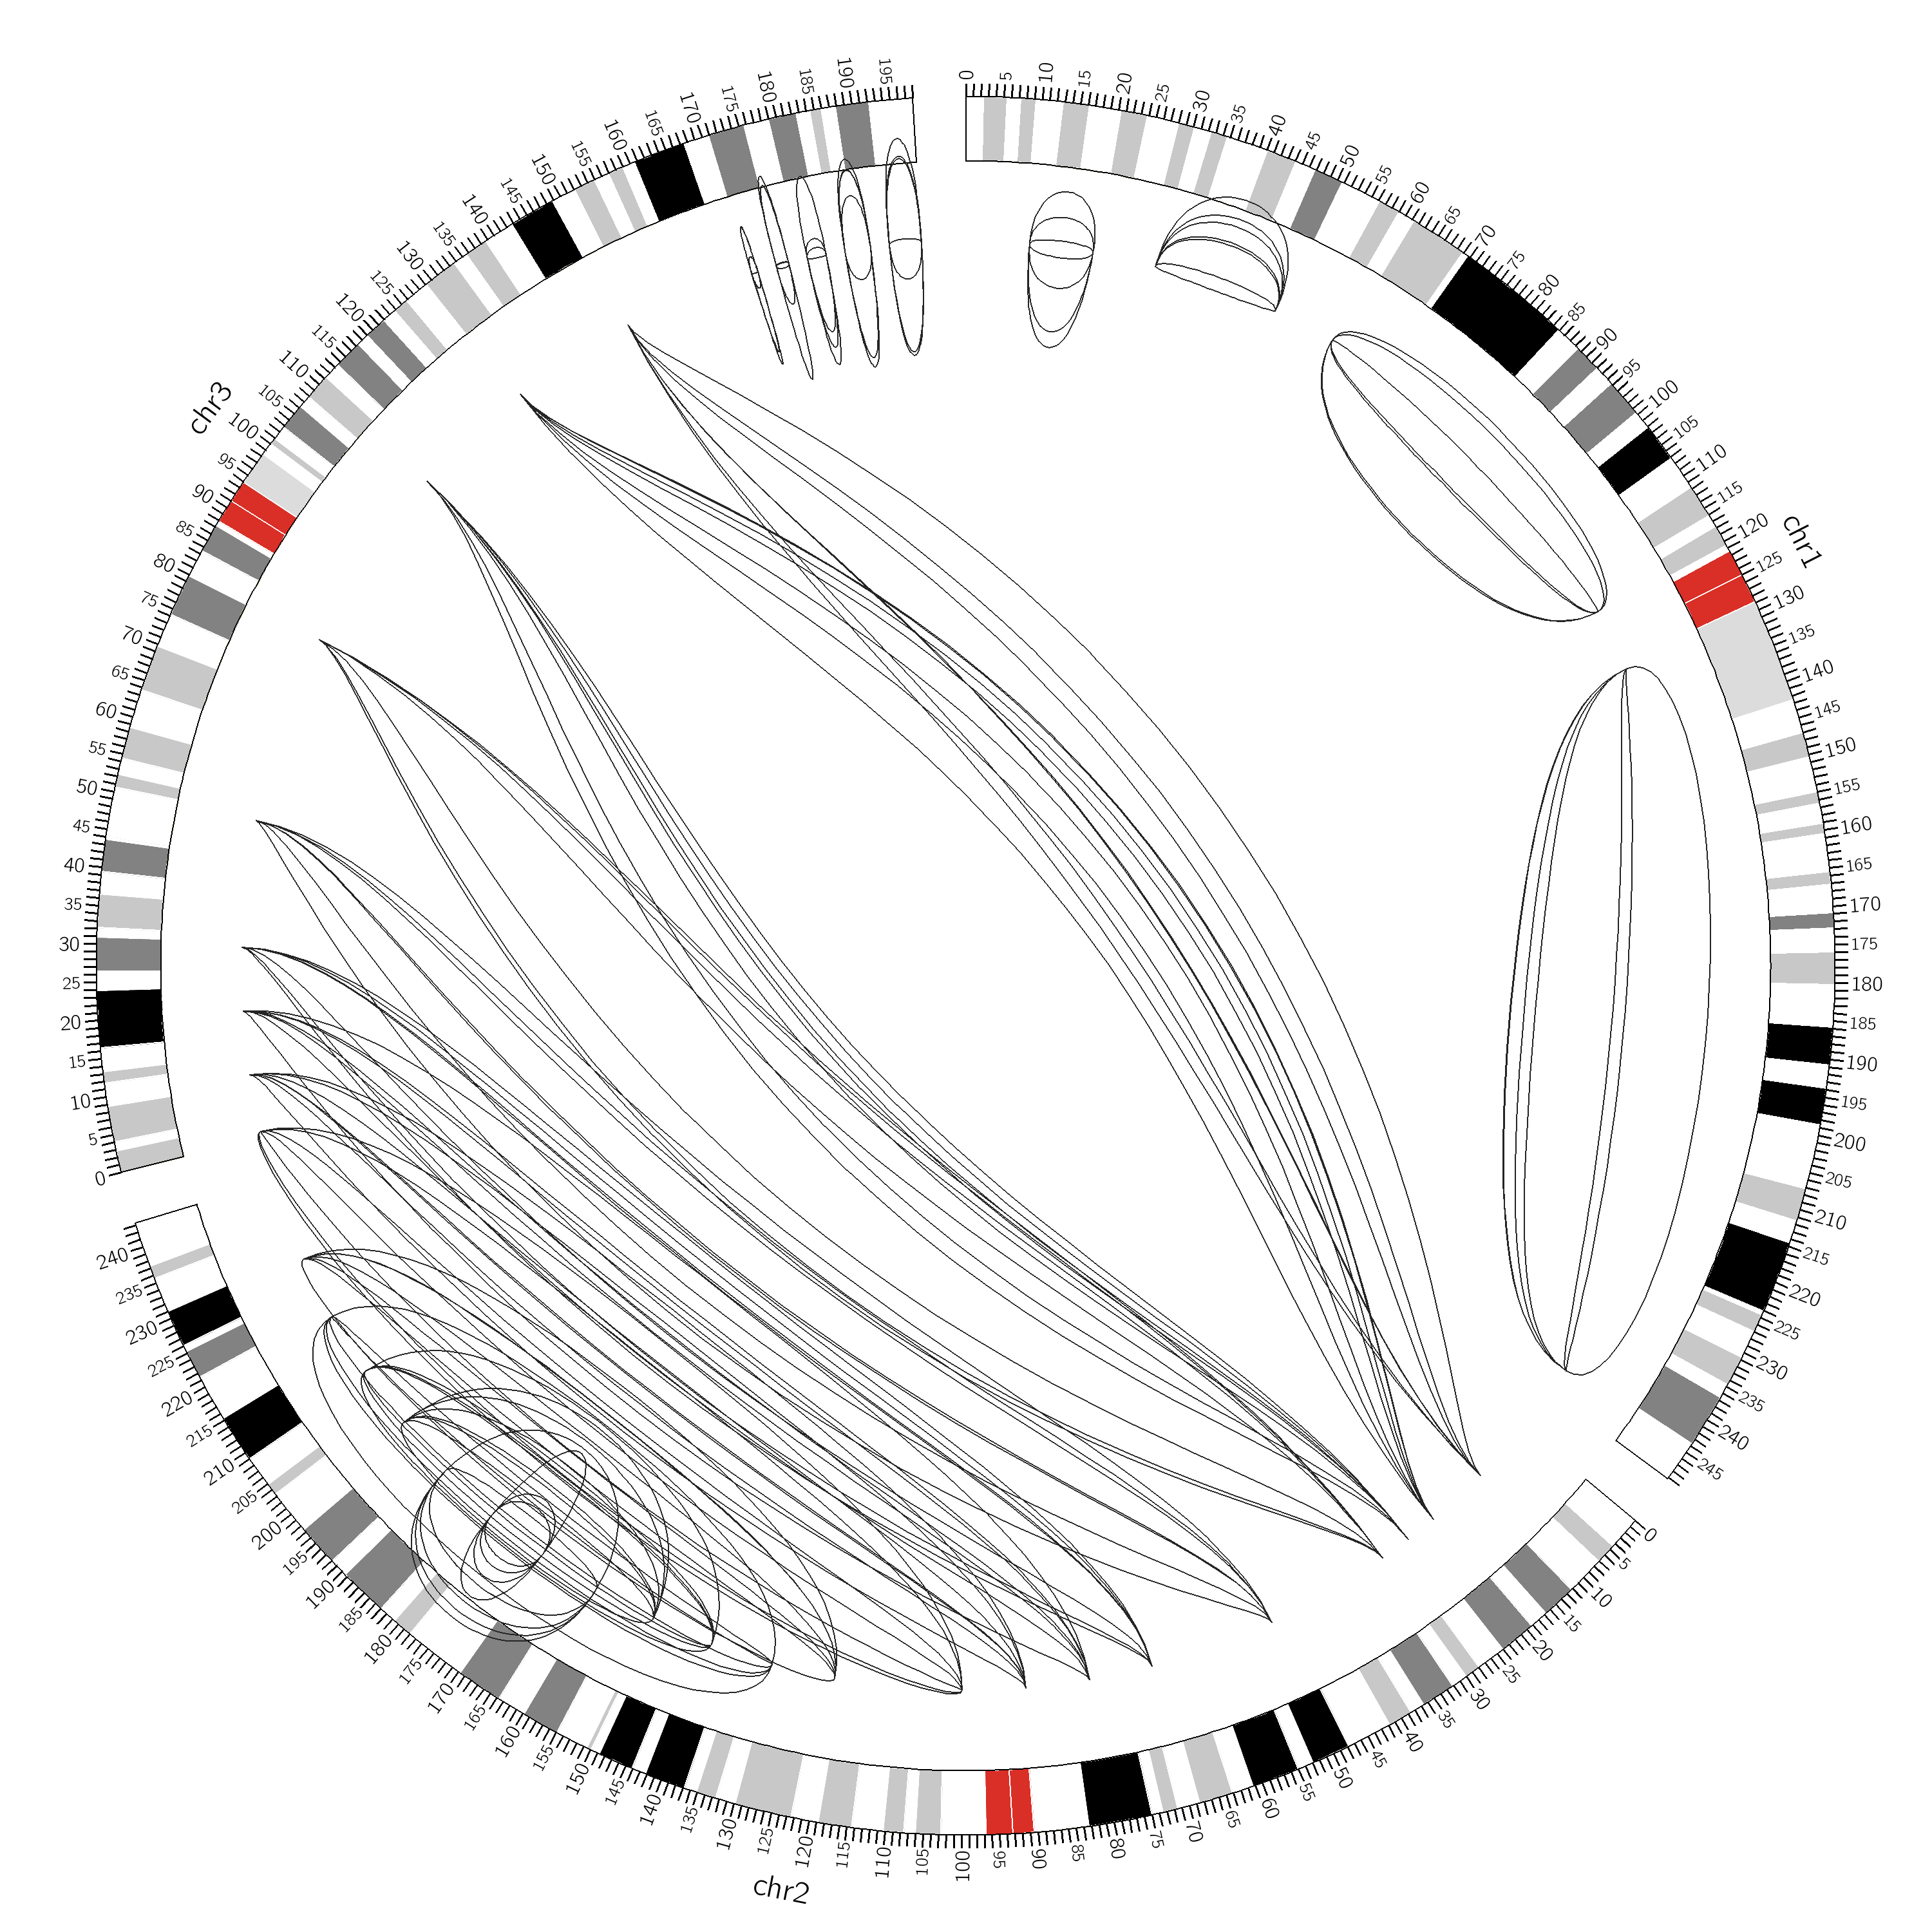

In [3]:
from IPython.display import Image
Image("circos.png")

----

Continue on to the next part of the Links and Relationships series by clicking [here &#10145;](Links_Part3.ipynb).

----